## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

from pathlib import Path
plt.style.use("ggplot")

## Data

In [2]:
PATH_DATA = Path("../Data")

train = pd.read_csv(PATH_DATA / "train.csv")
test = pd.read_csv(PATH_DATA / "test.csv")

In [3]:
train.head()

,Date (Year and Week Number),IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


## Arima

In [4]:
arima_model = pm.auto_arima(
    train["IsCanceled"],
    seasonal=True,
    start_p=0, start_q=0, max_p=10, max_q=10,
    start_P=0, start_Q=0, max_P=10, max_Q=10,
    m=51, stepwise=True,
    information_criterion="bic", trace=True,
    d=1, D=1, error_action="warn", suppress_warnings=True,
    random_state=42, n_fits=100
)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[51]             : BIC=589.394, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[51]             : BIC=inf, Time=2.06 sec
 ARIMA(0,1,1)(0,1,1)[51]             : BIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(1,1,0)[51]             : BIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,1,1)[51]             : BIC=inf, Time=2.99 sec
 ARIMA(0,1,0)(1,1,1)[51]             : BIC=596.858, Time=2.43 sec
 ARIMA(1,1,0)(0,1,0)[51]             : BIC=575.246, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[51]             : BIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(1,1,1)[51]             : BIC=582.179, Time=2.51 sec
 ARIMA(2,1,0)(0,1,0)[51]             : BIC=572.594, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[51]             : BIC=inf, Time=2.38 sec
 ARIMA(2,1,0)(0,1,1)[51]             : BIC=inf, Time=1.96 sec
 ARIMA(2,1,0)(1,1,1)[51]             : BIC=578.482, Time=3.18 sec
 ARIMA(3,1,0)(0,1,0)[51]             : BIC=576.416, Time=0.18 sec
 ARIMA(2,1,1)(0,1,0)[51]             : BIC=inf, Time=0.27 sec

In [5]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  103
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 51)   Log Likelihood                -280.399
Date:                            Sun, 17 Nov 2024   AIC                            566.798
Time:                                    11:24:07   BIC                            572.594
Sample:                                         0   HQIC                           569.013
                                            - 103                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7473      0.169     -4.428      0.000      -1.078      -0.417
ar.L2         -0.3539      0.171     -2.074      0.038      -0.688      -0.020
sigma2      3449.0899    605.882      5.693      0.000    2261.583    4636.597
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.38
Prob(Q):                              0.89   Prob(JB):                         0.18
Heteroskedasticity (H):               1.53   Skew:                            -0.50
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
predictions = arima_model.predict(n_periods=len(test))

In [7]:
train["Date (Year and Week Number)"] = train["Date (Year and Week Number)"].astype(str)
test["Date (Year and Week Number)"] = test["Date (Year and Week Number)"].astype(str)

In [8]:
train.set_index("Date (Year and Week Number)", inplace=True)
test.set_index("Date (Year and Week Number)", inplace=True)

In [9]:
predictions = pd.DataFrame(predictions, index=test.index, columns=["IsCanceled"])

<Axes: title={'center': 'ARIMA Model'}, xlabel='Date (Year and Week Number)'>

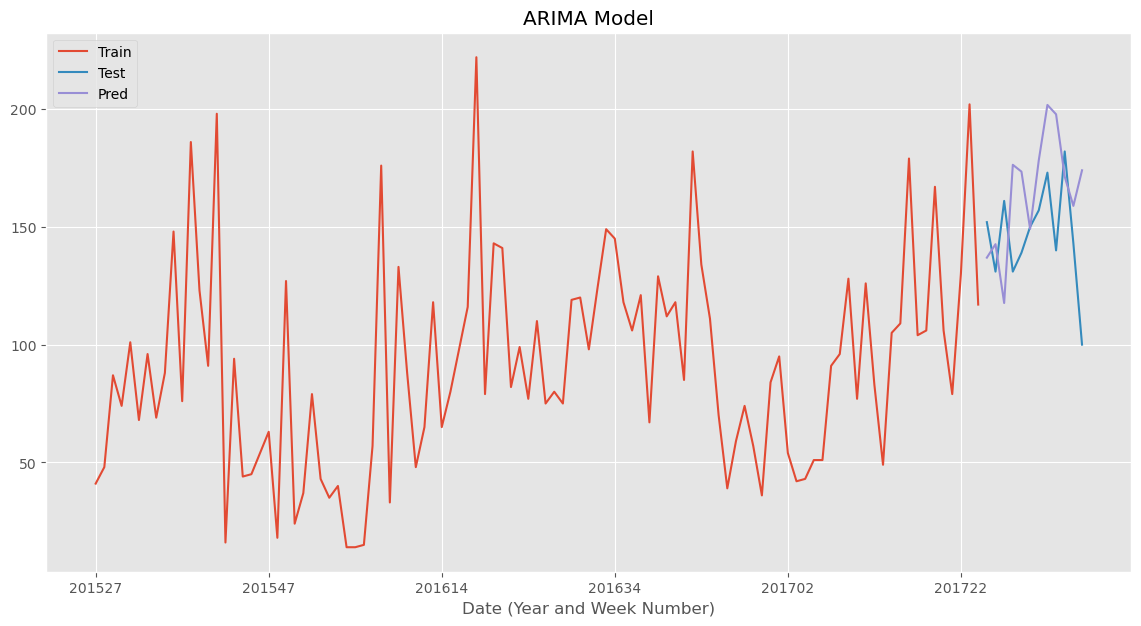

In [10]:
(
    pd.concat([train["IsCanceled"], test["IsCanceled"], predictions["IsCanceled"]], axis=1, keys=["Train", "Test", "Pred"]).
    plot(figsize=(14, 7), title="ARIMA Model")
)

## RMSE

In [11]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse(test["IsCanceled"], predictions["IsCanceled"])

36.448284829943475